In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## Figure 1
x1 = np.linspace(-5, 5, 100)
y1 = 10*(1/(1+np.exp(-x1)))
x2 = np.linspace(-5, 22, 100)
y2 = -0.3*x2**2 + 5*x2 + 30
x3 = np.linspace(1.1, 5, 100)
y3 = np.log(100*(x3-1))

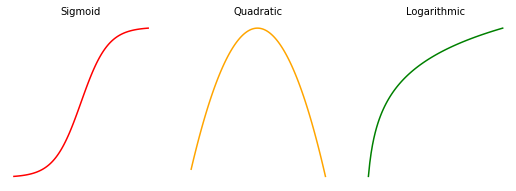

In [3]:
fig = plt.figure(figsize=(9,3))
plt.subplot(131)
plt.plot(x1, y1, color="red")
plt.xlabel('x')
plt.ylabel('y')
plt.axis('off')
plt.title('Sigmoid', fontsize=10)

plt.subplot(132)
plt.plot(x2, y2, color="orange")
plt.xlabel('x')
plt.ylabel('y')
plt.axis('off')
plt.title('Quadratic', fontsize=10)

plt.subplot(133)
plt.plot(x3, y3, color="green")
plt.xlabel('x')
plt.ylabel('y')
plt.axis('off')
plt.title('Logarithmic', fontsize=10)

plt.savefig("paper_figures/figure1.pdf", format="pdf", bbox_inches="tight")
plt.show()

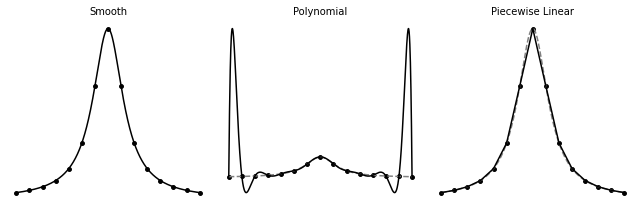

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# Define the smooth function
def f(x):
    return  1/(1 + x**2)

x = np.linspace(-5, 5, 15)
y = f(x)
x_dense = np.linspace(-5, 5, 1000)
y_dense = f(x_dense)

fig = plt.figure(figsize=(9,3))

# Leftmost panel: plot the smooth function
plt.subplot(1, 3, 1)
plt.plot(x_dense, y_dense, '-', color="black")
plt.scatter(x, y, s=15, color="black")
plt.axis('off')
plt.title("Smooth", fontsize=10)

# Middle panel: plot the truth plot (dash line) and Lagrange polynomial interpolation (black curve)
lagrange_poly = lagrange(x, y)
y_lagrange = lagrange_poly(x_dense)

plt.subplot(1, 3, 2)
plt.plot(x_dense, y_dense, '--', color="grey")
plt.scatter(x, y, s=15, color="black")
plt.plot(x_dense, y_lagrange, 'k-')
plt.axis('off')
plt.title("Polynomial", fontsize=10)

# Rightmost panel: plot the equivalent piecewise linear interpolation
plt.subplot(1, 3, 3)
plt.plot(x_dense, y_dense, '--', color="grey")
plt.plot(x, y, '-', color="black")
plt.scatter(x, y, s=15, color="black")
plt.axis('off')
plt.title("Piecewise Linear", fontsize=10)

plt.tight_layout()

plt.savefig("paper_figures/figure2.pdf", format="pdf", bbox_inches="tight")
plt.show()


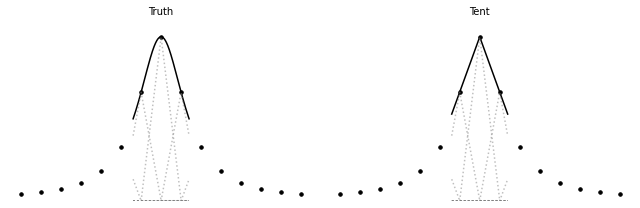

In [5]:
def tent_function(x, center, width):
    return np.maximum(1 - np.abs((x - center) / width), 0)

x_dense = np.linspace(-1, 1, 1000)
y_dense = f(x_dense)
width=x[1]-x[0]

fig = plt.figure(figsize=(9,3))

## left figure
plt.subplot(1, 2, 1)
plt.plot(x_dense, y_dense, '-', color="black")
plt.scatter(x, y, s=12, color="black")
interpolant = np.zeros_like(x_dense)
for i in range(len(x)):
    center = x[i]
    coeff = y[i]
    basis_function = tent_function(x_dense, center, width)
    interpolant += coeff * basis_function
    plt.plot(x_dense, coeff * basis_function, color='grey', linestyle=':', alpha=0.5)
plt.ylim(0,1.1)
plt.axis('off')
plt.title("Truth", fontsize=10)

# Right Figure
plt.subplot(1, 2, 2)
plt.plot(x_dense, interpolant, '-', color="black")
plt.scatter(x, y, s=12, color="black")

interpolant = np.zeros_like(x_dense)
for i in range(len(x)):
    center = x[i]
    coeff = y[i]
    basis_function = tent_function(x_dense, center, width)
    interpolant += coeff * basis_function
    plt.plot(x_dense, coeff * basis_function, color='grey', linestyle=':', alpha=0.5)

plt.ylim(0,1.1)
plt.axis('off')
plt.title("Tent", fontsize=10)

plt.tight_layout()
plt.savefig("paper_figures/figure3.pdf", format="pdf", bbox_inches="tight")
plt.show()

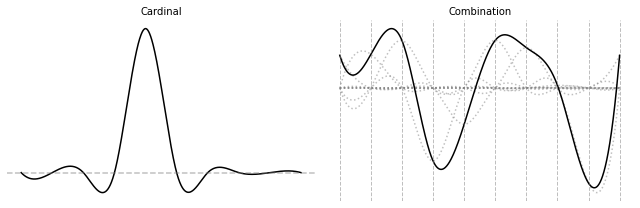

In [6]:
from scipy.interpolate import CubicSpline

# Define the cardinal basis function for a cubic regression spline
def cardinal_basis(x, knots, index):
    spline = CubicSpline(knots, np.eye(len(knots)))
    return spline(x, nu=0, extrapolate=None)[:, index]

# Generate x values and corresponding y values
x = np.linspace(-1, 1, 1000)
knots = np.linspace(-1, 1, 10)
y = np.sin(2 * np.pi * knots) + 0.5 * np.cos(4 * np.pi * knots)

fig = plt.figure(figsize=(9,3))
# Left panel: plot the b_4(x) basis function
plt.subplot(1, 2, 1)
basis_function_index = 4
plt.plot(x, cardinal_basis(x, knots, basis_function_index), color="black")
plt.axhline(y = 0, color = 'grey', linestyle = '--', alpha=0.5)
plt.axis('off')
plt.title("Cardinal", fontsize=10)

# Right panel: plot the combination of basis functions
plt.subplot(1, 2, 2)

basis_matrix = np.column_stack([cardinal_basis(knots, knots, i) for i in range(len(knots))])
coefficients = np.linalg.lstsq(basis_matrix, y, rcond=None)[0]

smooth_curve = np.zeros_like(x)
for i in range(len(knots)):
    basis_function = cardinal_basis(x, knots, i)
    scaled_basis_function = coefficients[i] * basis_function
    smooth_curve += scaled_basis_function

    # Plot the scaled basis function as a dotted grey line
    plt.plot(x, scaled_basis_function, color='grey', linestyle=':', alpha=0.5)

# Plot the smooth curve
plt.plot(x, smooth_curve, 'k-', label="Smooth curve")

# Add thin vertical lines at knot locations
for knot in knots:
    plt.axvline(x=knot, color='grey', linestyle='--', linewidth=1, alpha=0.5)
plt.axis('off')
plt.title("Combination", fontsize=10)

# Adjust the layout and display the plot
plt.tight_layout()
plt.savefig("paper_figures/figure4.pdf", format="pdf", bbox_inches="tight")
plt.show()

[-1.9 -0.7  0.5  2. ]


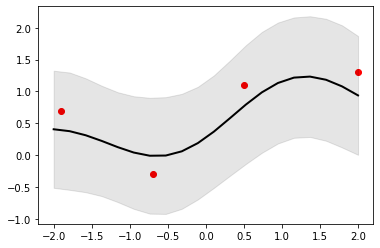

In [14]:
import gammy
from gammy.arraymapper import x
import matplotlib.pyplot as plt
import numpy as np
from gammy.arraymapper import x

n=5

input_data = np.array([-1.9,-0.7,0.5,2])
print(input_data)
y = np.array([0.7,-0.3,1.1,1.3])
# y = (
#    input_data ** 2 * np.sin(2 * np.pi * input_data) + 1  
#     + 0.1 * np.random.randn(n)# Simulated pseudo-random noise
# )

# Define model
f = gammy.ExpSquared1d(
    grid=np.arange(-2, 2, 0.01),
    corrlen=0.9,
    sigma=0.8,  
    energy=0.99
)
formula = f(x)
model = gammy.models.bayespy.GAM(formula).fit(input_data, y)

grid_limits = [-2,2]
input_maps=[x, x]

grid = np.array(
        utils.listmap(lambda x: np.linspace(x[0], x[1], gridsize))(grid_limits)
    ).T if len(input_data.shape) == 2 else np.linspace(
        grid_limits[0], grid_limits[1], 20
    )
marginals = model.predict_variance_marginals(grid)
residuals = model.marginal_residuals(input_data, y)

for i, ((mu, sigma), res, input_map) in enumerate(
        zip(marginals, residuals, input_maps)
    ):
    x = input_map(grid)
    
    (lower, upper) = (
        mu - 2 * np.sqrt(sigma),
        mu + 2 * np.sqrt(sigma)
    )
    plt.scatter(input_map(input_data), res, color="red")
    plt.plot(x, mu, c='k', lw=2)
    plt.fill_between(x, lower, upper, alpha=0.1, color="k")
    plt.show()


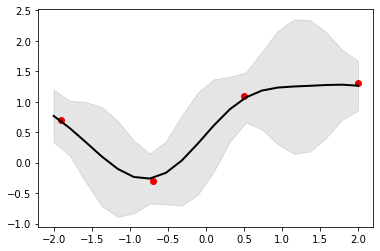

In [13]:
import gammy
from gammy.arraymapper import x
import matplotlib.pyplot as plt
import numpy as np
from gammy.arraymapper import x
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.gaussian_process.kernels import ExpSineSquared

n=5

input_data = np.array([-1.9,-0.7,0.5,2])
y = np.array([0.7,-0.3,1.1,1.3])

def kernel_periodic(x1, x2, length_scale=1.0, periodicity=5.0):
    dists = euclidean_distances(x1, x2)
    return np.exp(-2 * np.sin(np.pi * dists / periodicity) ** 2 / length_scale ** 2)

Minimum = gammy.create_from_kernel1d(kernel_periodic)
grid = np.arange(-2, 2, 0.01)
formula = Minimum(grid=grid, energy=0.999)(x)

# formula = a(x)
model = gammy.models.bayespy.GAM(formula).fit(input_data, y)

grid_limits = [-2,2]
input_maps=[x, x]

grid = np.array(
        utils.listmap(lambda x: np.linspace(x[0], x[1], gridsize))(grid_limits)
    ).T if len(input_data.shape) == 2 else np.linspace(
        grid_limits[0], grid_limits[1], 20
    )
marginals = model.predict_variance_marginals(grid)
residuals = model.marginal_residuals(input_data, y)

for i, ((mu, sigma), res, input_map) in enumerate(
        zip(marginals, residuals, input_maps)
    ):
    x = input_map(grid)
    
    (lower, upper) = (
        mu - 2 * np.sqrt(sigma),
        mu + 2 * np.sqrt(sigma)
    )
    plt.scatter(input_map(input_data), res, color="red")
    plt.plot(x, mu, c='k', lw=2)
    plt.fill_between(x, lower, upper, alpha=0.1, color="k")
    plt.show()


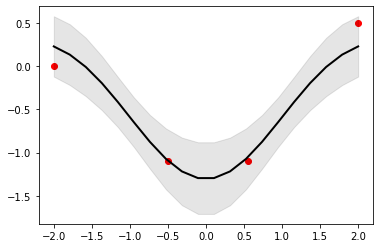

In [12]:
import gammy
from gammy.arraymapper import x
import matplotlib.pyplot as plt
import numpy as np
from gammy.arraymapper import x
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.gaussian_process.kernels import ExpSineSquared

n=5

input_data_sym = np.array([-2,-0.5,0.55,2])
y_sym = np.array([0,-1.1,-1.1,0.5])

def kernel_symmetric(x1, x2, length_scale=1.0):
    x1_pos = np.copy(x1)
    x1_neg = np.copy(x1)
    x1_neg[:, 0] = -x1_neg[:, 0]
    kernel_rbf_pos = np.exp(-0.5 * euclidean_distances(x1_pos, x2) ** 2 / length_scale ** 2)
    kernel_rbf_neg = np.exp(-0.5 * euclidean_distances(x1_neg, x2) ** 2 / length_scale ** 2)
    return kernel_rbf_pos + kernel_rbf_neg

Minimum = gammy.create_from_kernel1d(kernel_symmetric)
grid = np.arange(-2, 2, 0.01)
formula = Minimum(grid=grid, energy=0.999)(x)

# formula = a(x)
model = gammy.models.bayespy.GAM(formula).fit(input_data_sym, y_sym)

grid_limits = [-2,2]
input_maps=[x, x]

grid = np.array(
        utils.listmap(lambda x: np.linspace(x[0], x[1], gridsize))(grid_limits)
    ).T if len(input_data_sym.shape) == 2 else np.linspace(
        grid_limits[0], grid_limits[1], 20
    )
marginals = model.predict_variance_marginals(grid)
residuals = model.marginal_residuals(input_data_sym, y_sym)

for i, ((mu, sigma), res, input_map) in enumerate(
        zip(marginals, residuals, input_maps)
    ):
    x = input_map(grid)
    
    (lower, upper) = (
        mu - 2 * np.sqrt(sigma),
        mu + 2 * np.sqrt(sigma)
    )
    plt.scatter(input_map(input_data_sym), res, color="red")
    plt.plot(x, mu, c='k', lw=2)
    plt.fill_between(x, lower, upper, alpha=0.1, color="k")
    plt.show()

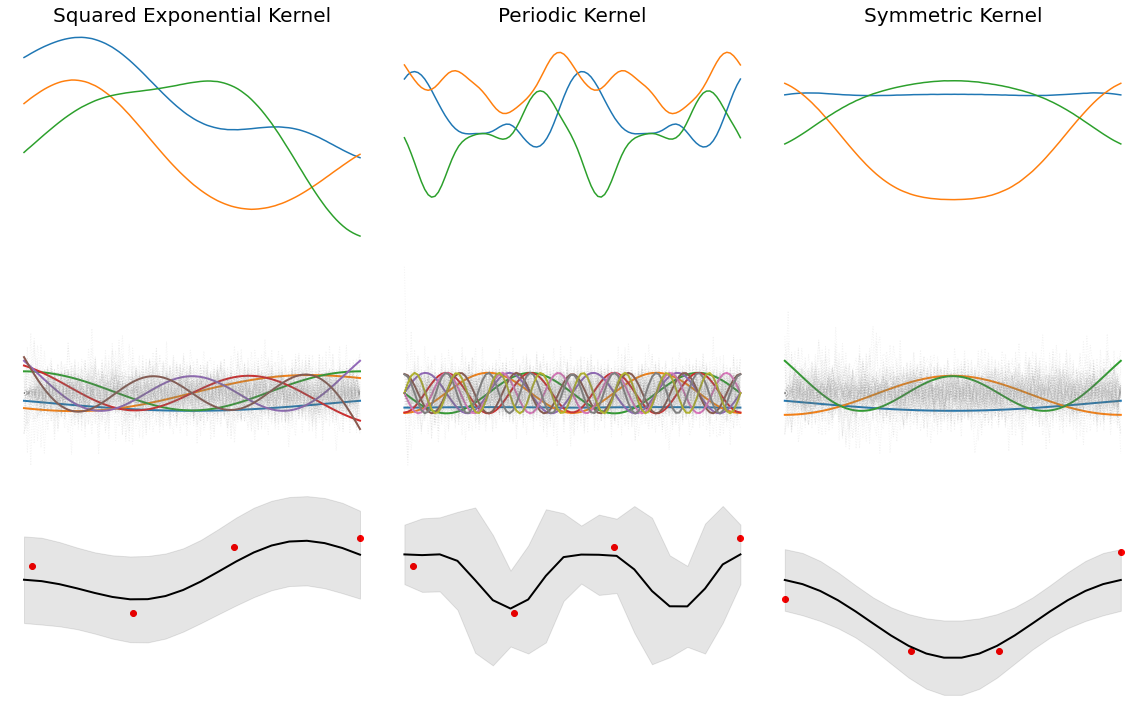

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.gaussian_process.kernels import ExpSineSquared, RBF
import gammy
from gammy.arraymapper import x
from gammy import utils
import gammy.models.bayespy

kernel_rbf = RBF(length_scale=1.0)

def kernel_periodic(x1, x2, length_scale=1.0, periodicity=2.0):
    dists = euclidean_distances(x1, x2)
    return np.exp(-2 * np.sin(np.pi * dists / periodicity) ** 2 / length_scale ** 2)

def kernel_symmetric(x1, x2, length_scale=1.0):
    x1_pos = np.copy(x1)
    x1_neg = np.copy(x1)
    x1_neg[:, 0] = -x1_neg[:, 0]
    kernel_rbf_pos = np.exp(-0.5 * euclidean_distances(x1_pos, x2) ** 2 / length_scale ** 2)
    kernel_rbf_neg = np.exp(-0.5 * euclidean_distances(x1_neg, x2) ** 2 / length_scale ** 2)
    return kernel_rbf_pos + kernel_rbf_neg

def generate_random_functions(x, kernel_function, num_functions=3):
    K = kernel_function(x[:, np.newaxis], x[:, np.newaxis])
    L = np.linalg.cholesky(K + 1e-6 * np.eye(len(x)))
    random_functions = np.dot(L, np.random.normal(size=(len(x), num_functions)))
    return random_functions

def plot_random_and_basis_functions(ax, x, kernel_function, random=True, threshold=0.999):
    if random:
        random_functions = generate_random_functions(x, kernel_function)
        ax.plot(x, random_functions)
    else:
        K = kernel_function(x[:, np.newaxis], x[:, np.newaxis])
        eigenvalues, eigenvectors = np.linalg.eigh(K)
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]

        # Select k eigenvalues and eigenvectors based on the threshold
        cumulative_sum = np.cumsum(eigenvalues)
        total_sum = np.sum(eigenvalues)
        k = np.argmax(cumulative_sum / total_sum >= threshold)

        # Plot selected and unselected basis functions
        ax.plot(x, eigenvectors[:, :k+1], linewidth=2)
        ax.plot(x, eigenvectors[:, k+1:], linewidth=1, linestyle=':', color="gray", alpha=0.1)

x_array = np.linspace(-2, 2, 100)
kernels = [kernel_rbf, kernel_periodic, kernel_symmetric]
titles = ["Squared Exponential Kernel", "Periodic Kernel", "Symmetric Kernel"]

# Create 3x3 grid of plots
fig, axs = plt.subplots(3, 3, figsize=(16, 10), sharex=True, sharey='row')

kernel_functions = [lambda x1, x2: RBF(length_scale=1.0)(x1, x2),
                    kernel_periodic,
                    kernel_symmetric]

# Random functions and basis functions 
for i, kernel in enumerate(kernels):
    plot_random_and_basis_functions(axs[0, i], x_array, kernel, random=True)
    axs[0, i].set_title(f"{titles[i]}", fontsize=20)
    axs[0, i].axis("off")

    plot_random_and_basis_functions(axs[1, i], x_array, kernel, random=False)
    axs[1, i].axis("off")

## Fitting Functions
input_data = np.array([-1.9,-0.7,0.5,2])
y = np.array([0.7,-0.3,1.1,1.3])

input_data_sym = np.array([-2, -0.5, 0.55, 2])
y_sym = np.array([0, -1.1, -1.1, 1])

grid_limits = [-2, 2]
gridsize = 20
input_maps = [x, x]

for i, kernel_function in enumerate(kernel_functions):
    if i == 0:
        f = gammy.ExpSquared1d(grid=np.arange(-2, 2, 0.01), corrlen=0.9, sigma=0.8, energy=0.99)
        formula = f(x)
        model = gammy.models.bayespy.GAM(formula).fit(input_data, y)
    elif i == 1:
        Minimum = gammy.create_from_kernel1d(kernel_periodic)
        grid = np.arange(-3, 3, 0.01)
        formula = Minimum(grid=grid, energy=0.999)(x)
        model = gammy.models.bayespy.GAM(formula).fit(input_data, y)
    else:
        Minimum = gammy.create_from_kernel1d(kernel_symmetric)
        grid = np.arange(-2, 2, 0.01)
        formula = Minimum(grid=grid, energy=0.999)(x)
        model = gammy.models.bayespy.GAM(formula).fit(input_data_sym, y_sym)

    grid = np.array(
        utils.listmap(lambda x: np.linspace(x[0], x[1], gridsize))(grid_limits)
    ).T if len(input_data.shape) == 2 else np.linspace(
        grid_limits[0], grid_limits[1], 20
    )

    marginals = model.predict_variance_marginals(grid)
    residuals = model.marginal_residuals(input_data if i != 2 else input_data_sym, y if i != 2 else y_sym)

    for ((mu, sigma), res, input_map) in zip(marginals, residuals, input_maps):
        x_vals = input_map(grid)  
        (lower, upper) = (
            mu - 2 * np.sqrt(sigma),
            mu + 2 * np.sqrt(sigma)
        )
        axs[2, i].scatter(input_map(input_data if i != 2 else input_data_sym), res, color="red")
        axs[2, i].plot(x_vals, mu, c='k', lw=2)  
        axs[2, i].fill_between(x_vals, lower, upper, alpha=0.1, color="k")  
        # axs[2, i].set_ylim(-2.5, 3)
        axs[2, i].axis("off")

plt.tight_layout()
plt.savefig("paper_figures/figure5.pdf", format="pdf", bbox_inches="tight")
plt.show()

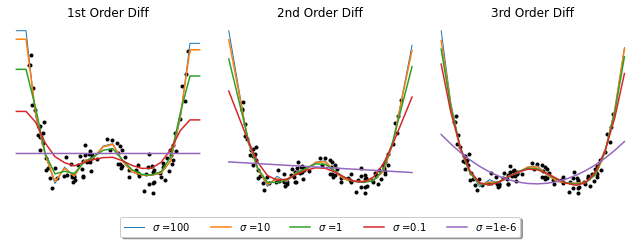

In [8]:
## Figure 6
import blinpy as bp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

xobs = -1.75 + 3.5*np.random.random(100)
yobs = 3*xobs**4-6*xobs**2+2 + np.random.randn(len(xobs))
data = pd.DataFrame({'x': xobs, 'y': yobs})
xfit = np.linspace(-2,2,20)
nfit = len(xfit)

# function for generating the GAM specification given prior order and variance
generate_gam_spec = lambda pri_order, pri_var: [
    {
        'fun': lambda df: bp.utils.interp_matrix(df['x'].values, xfit, sparse=False),
        'name': 'smoothfun',
        'prior': {
            'B': bp.utils.diffmat(nfit, order=pri_order, sparse=False),
            'mu': np.zeros(nfit-pri_order),
            'cov': pri_var*np.ones(nfit-pri_order)
        }
    }
]

pri_covs = [100, 10, 1, 0.1, 1e-6]

# fit the models with various prior orders and variances and collect the posterior means
yfits1 = [bp.models.GamModel('y', generate_gam_spec(1, pri_cov)).fit(data).post_mu for pri_cov in pri_covs]
yfits2 = [bp.models.GamModel('y', generate_gam_spec(2, pri_cov)).fit(data).post_mu for pri_cov in pri_covs]
yfits3 = [bp.models.GamModel('y', generate_gam_spec(3, pri_cov)).fit(data).post_mu for pri_cov in pri_covs]

fig, axs = plt.subplots(1, 3, figsize=(9, 3))

axs[0].plot(xobs, yobs, 'k.')
axs[0].plot(xfit, yfits1[0], '-', lw=1, label="$\sigma$ =100")
axs[0].plot(xfit, yfits1[1], '-', label="$\sigma$ =10")
axs[0].plot(xfit, yfits1[2], '-', label="$\sigma$ =1")
axs[0].plot(xfit, yfits1[3], '-', label="$\sigma$ =0.1")
axs[0].plot(xfit, yfits1[4], '-', label="$\sigma$ =1e-6")
#axs[0].set_ylim((-1, 3.5))
axs[0].set_xlim((-2.2, 2.2))
axs[0].set_title('1st Order Diff')
axs[0].axis('off')

axs[1].plot(xobs, yobs, 'k.')
axs[1].plot(xfit, yfits2[0], '-', lw=1)
axs[1].plot(xfit, yfits2[1], '-')
axs[1].plot(xfit, yfits2[2], '-')
axs[1].plot(xfit, yfits2[3], '-')
axs[1].plot(xfit, yfits2[4], '-')
#axs[1].set_ylim((-1, 3.5))
axs[1].set_xlim((-2.2, 2.2))
axs[1].axis('off')
axs[1].set_title('2nd Order Diff')

axs[2].plot(xobs, yobs, 'k.')
axs[2].plot(xfit, yfits3[0], '-', lw=1)
axs[2].plot(xfit, yfits3[1], '-')
axs[2].plot(xfit, yfits3[2], '-')
axs[2].plot(xfit, yfits3[3], '-')
axs[2].plot(xfit, yfits3[4], '-')
axs[2].set_title('3rd Order Diff')
#axs[2].set_ylim((-1, 3.5))
axs[2].set_xlim((-2.2, 2.2))
axs[2].axis('off')

fig.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, 0),
    bbox_transform=fig.transFigure,
    fancybox=True,
    shadow=True,
    ncol=5,
)

fig.tight_layout()
fig.savefig("paper_figures/figure6.pdf", format="pdf", bbox_inches="tight")
plt.show()

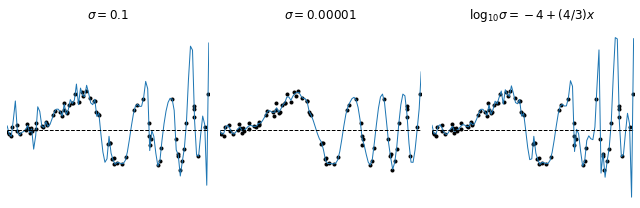

In [7]:
## Figure 7 
import blinpy as bp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

xobs = -1 + 4 * np.random.random(100)
yobs = np.sin(xobs**3)+ 0.1*np.random.randn(len(xobs))
# yobs = np.sin(2 * np.pi * xobs) + 0.5 * xobs**2 + 0.2 * np.random.randn(len(xobs))

data = pd.DataFrame({'x': xobs, 'y': yobs})
xfit = np.linspace(0,3,100)
nfit = len(xfit)

# function for generating GAM specification given prior variance
generate_gam_spec = lambda pri_var: [
    {
        'fun': lambda df: bp.utils.interp_matrix(df['x'].values, xfit, sparse=False),
        'name': 'smoothfun',
        'prior': {
            'B': bp.utils.diffmat(nfit, order=2, sparse=False),
            'mu': np.zeros(nfit-2),
            'cov': pri_var
        }
    }
]

# choose a spatially varying covariance manually
pri_cov = (10**(-3 + 4./3*xfit))[1:-1]

# fit the models with various prior variances
yfit1 = bp.models.GamModel('y', generate_gam_spec(0.1*np.ones(nfit-2))).fit(data, obs_cov=0.01**2).post_mu
yfit2 = bp.models.GamModel('y', generate_gam_spec(0.00001*np.ones(nfit-2))).fit(data, obs_cov=0.001**2).post_mu
yfit3 = bp.models.GamModel('y', generate_gam_spec(pri_cov)).fit(data, obs_cov=0.01**2).post_mu


fig, axs = plt.subplots(1, 3, figsize=(9, 3))

axs[0].plot(xobs, yobs, 'k.')
axs[0].plot(xfit, yfit1, '-', lw=1)
axs[0].axhline(y=0, color='k', linestyle='--', lw=1)
axs[0].set_xlim((0, 3))
axs[0].set_ylim((-2, 3))
axs[0].set_title('$\sigma=0.1$')
axs[0].axis('off')


axs[1].plot(xobs, yobs, 'k.')
axs[1].plot(xfit, yfit2, '-', lw=1)
axs[1].axhline(y=0, color='k', linestyle='--', lw=1)
axs[1].set_xlim((0, 3))
axs[1].set_ylim((-2, 3))
axs[1].set_title('$\sigma=0.00001$')
axs[1].axis('off')

axs[2].plot(xobs, yobs, 'k.')
axs[2].plot(xfit, yfit3, '-', lw=1)
axs[2].axhline(y=0, color='k', linestyle='--', lw=1)
axs[2].set_title('$\log_{10}\sigma=-4+(4/3)x$')
axs[2].set_xlim((0, 3))
axs[2].set_ylim((-2, 3))
axs[2].axis('off')

fig.tight_layout()
fig.savefig("paper_figures/figure7.pdf", format="pdf", bbox_inches="tight")
plt.show()

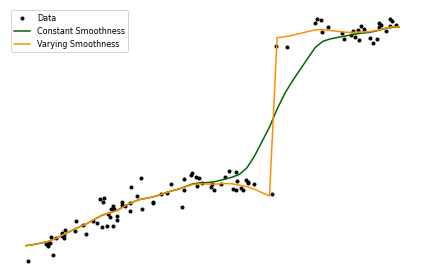

In [10]:
## Figure 8
import blinpy as bp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# generate data
xobs = 3*np.random.random(100)
# yobs = np.sin(xobs) + 3*np.cos(xobs) + (xobs > 2)*xobs + 0.1*np.random.randn(len(xobs))
yobs = np.sin(xobs) + (xobs > 2) * xobs + 0.1 * np.random.randn(len(xobs))

data = pd.DataFrame({'x': xobs, 'y': yobs})
xfit = np.linspace(0,3,50)
n = len(xfit)

# function for generating GAM specs given prior variance
generate_gam_spec = lambda pri_var: [
    {
        'fun': lambda df: bp.utils.interp_matrix(df['x'].values, xfit, sparse=False),
        'name': 'smoothfun',
        'prior': {
            'B': bp.utils.diffmat(n, order=1, sparse=False),
            'mu': np.zeros(n-1),
            'cov': pri_var
        }
    }
]

# increase the prior variance at the discontinuity
pri_covs = 0.001*np.ones(n-1)
pri_covs[32] = 10000

# fit the models
yfit1 = bp.models.GamModel('y', generate_gam_spec(0.001*np.ones(n-1))).fit(data, obs_cov=0.1**2).post_mu
yfit2 = bp.models.GamModel('y', generate_gam_spec(pri_covs)).fit(data, obs_cov=0.1**2).post_mu

plt.figure(figsize=(6,4))
plt.plot(xobs, yobs, 'k.')
plt.plot(xfit, yfit1, '-', color="darkgreen")
plt.plot(xfit, yfit2, '-', color="darkorange")
plt.axis("off")
plt.legend(['Data', 'Constant Smoothness', 'Varying Smoothness'], fontsize=8)

plt.tight_layout()
plt.savefig("paper_figures/figure8.pdf", format="pdf", bbox_inches="tight")
plt.show()

<ipython-input-11-7b3c7914b492>:79: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


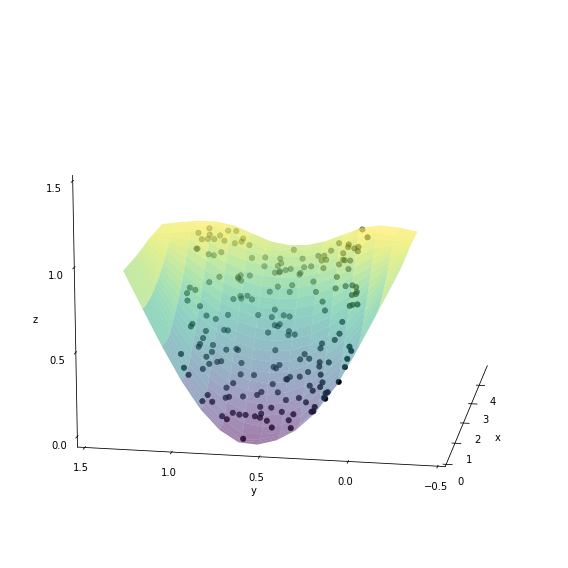

In [11]:
## Figure 9
import blinpy as bp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.optimize import minimize
%matplotlib inline

# generate random data
x1 = 2*np.random.random(200)
x2 = np.random.random(200)
yobs = 0.5*x1 + 2*(x2-0.5)**2/(1 + x1)

data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': yobs})

# define the grid points for function estimation
grids = (np.linspace(-0.25,2.25,25), np.linspace(-0.25,1.25,15))
shape = [len(x) for x in grids]

# diff priors along different dimensions 
D1 = bp.utils.diffmatn(shape, 0, order=1)
D2 = bp.utils.diffmatn(shape, 1, order=2)
D = sparse.vstack((D1,D2))

# prior variances
pri_var = np.concatenate((0.001*np.ones(D1.shape[0]), 0.01*np.ones(D2.shape[0])))

# GAM specification for 2d fit
gam_spec = [
    {
        'fun': lambda df: bp.utils.interpn_matrix(df[['x1','x2']].values, grids),
        'name': 'smoothfun_2d',
        'prior': {
            'B': D,
            'mu': np.zeros(D.shape[0]),
            'cov': pri_var
        }
    }
]
# fit the model
yfit = bp.models.GamModel('y', gam_spec).fit(data, obs_cov=0.01**2).post_mu


from mpl_toolkits.mplot3d import axes3d

X, Y = np.meshgrid(*grids, indexing='ij')

fig = plt.figure(figsize=(8, 8),constrained_layout=True)
ax = fig.add_subplot(projection='3d')

# Use plot_surface with a colormap instead of plot_wireframe
surf = ax.plot_surface(X, Y, yfit.reshape(shape), cmap='viridis', alpha=0.5)

ax.scatter(x1, x2, yobs, c='k', marker='o', s=30, edgecolors='k', linewidths=0.5)

ax.set_xlim((0, 5))
ax.set_ylim((-0.5, 1.5))

ax.set_xticks(np.arange(0, 5, 1))
ax.set_yticks(np.arange(-0.5, 1.6, 0.5))
ax.set_zticks(np.arange(0, 2, 0.5))

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.grid(False)
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.view_init(elev=14, azim=-170)
# fig.subplots_adjust(top=-0.9, bottom=-1.0) 
plt.tight_layout()
plt.savefig("paper_figures/figure9.pdf", format="pdf", bbox_inches="tight")
plt.show()